In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('exercise_data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


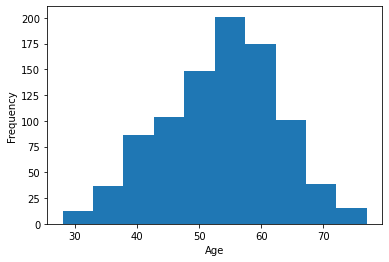

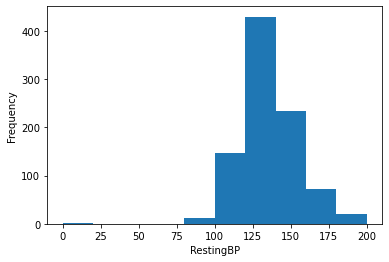

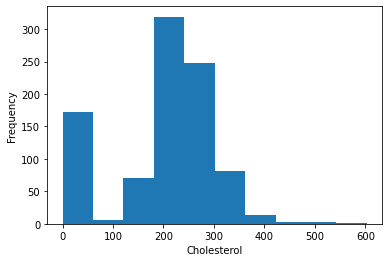

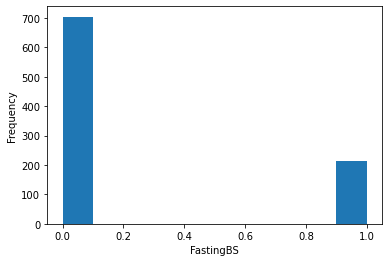

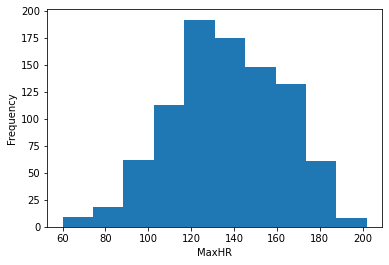

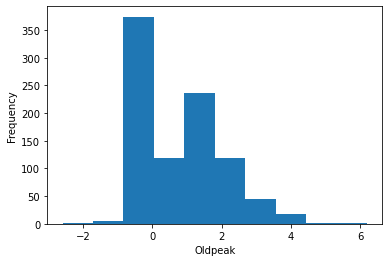

In [10]:
for names in ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']:
    df[names].plot(kind='hist')
    plt.xlabel(names)
    plt.show()

In [26]:
for names in ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    df[names+'_zscore']=df[names].apply(lambda x: zscore(x,df[names].mean(),df[names].std()))

In [29]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,MaxHR_zscore,Oldpeak_zscore
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02,9.180000e+02
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,-1.393221e-16,2.031781e-16,3.096047e-17,5.263280e-16,1.083616e-16
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,-2.704540e+00,-7.151097e+00,-1.817444e+00,-3.016825e+00,-3.269699e+00
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,-6.902531e-01,-6.695696e-01,-2.335765e-01,-6.602179e-01,-8.319789e-01
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,5.185271e-02,-1.294423e-01,2.212426e-01,4.676419e-02,-2.694280e-01
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,6.879435e-01,4.106850e-01,6.234947e-01,7.537463e-01,5.743984e-01
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,2.490201e+00,3.651449e+00,3.695238e+00,2.560478e+00,4.981047e+00


In [42]:
df1=df.copy()
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,MaxHR_zscore,Oldpeak_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.581664,-0.831979


In [43]:
for names in [ 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']:
    df1=df1[df1[names+'_zscore'] >= -3]
    print(df1.shape)
    df1=df1[df1[names+'_zscore'] <= 3]
    print(df1.shape)
    df.drop(columns=names+'_zscore',inplace=True)


(917, 17)
(910, 17)
(910, 17)
(907, 17)
(906, 17)
(906, 17)
(905, 17)
(899, 17)


In [44]:
df.drop(columns='Age'+'_zscore',inplace=True)

In [51]:
df.shape

(918, 12)

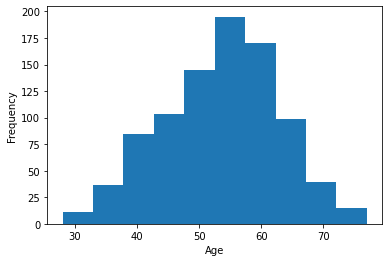

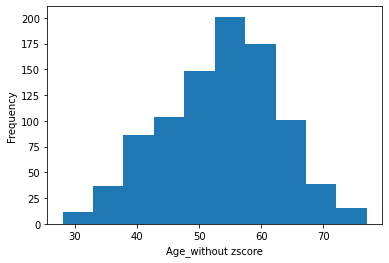

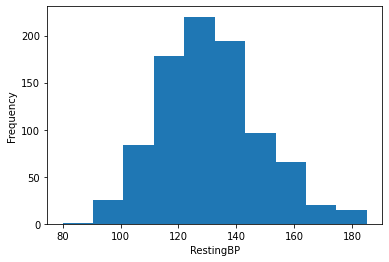

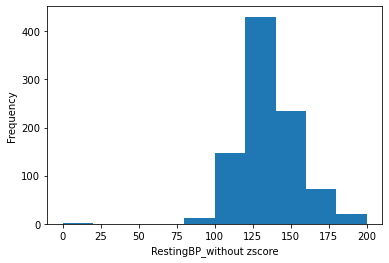

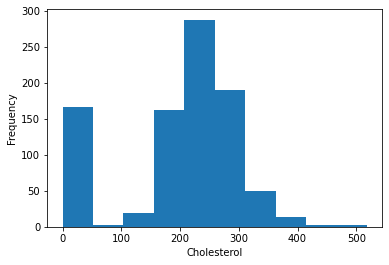

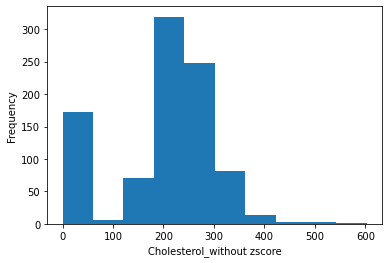

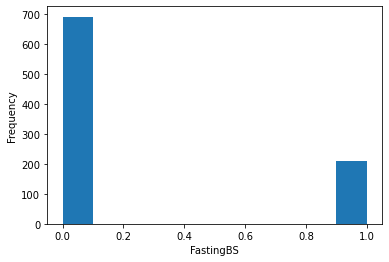

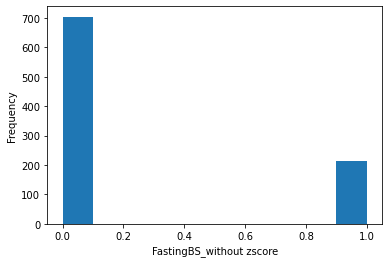

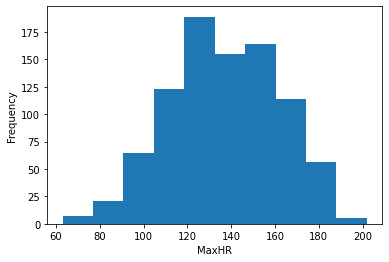

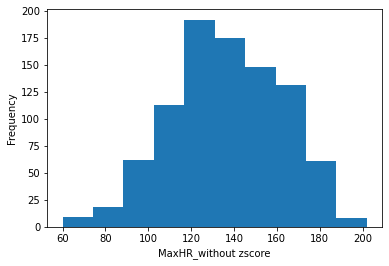

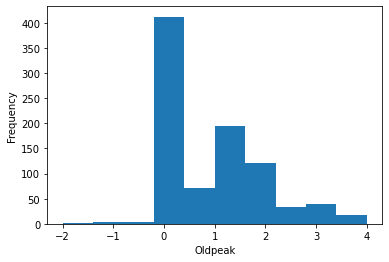

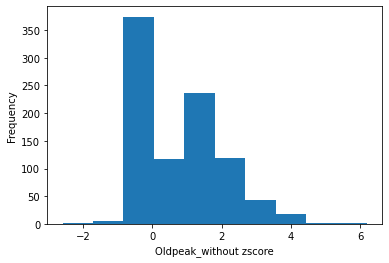

In [50]:
for names in ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']:
    df1[names].plot(kind='hist')
    plt.xlabel(names)
    plt.show()
    df[names].plot(kind='hist')
    plt.xlabel(names+"_without zscore")
    plt.show()

In [13]:
def zscore(x,mean,std):
    return (x-mean)/std

In [57]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_zscore,RestingBP_zscore,Cholesterol_zscore,MaxHR_zscore,Oldpeak_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-1.432359,0.410685,0.824621,1.382175,-0.831979
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.478223,1.490940,-0.171867,0.753746,0.105606
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.750404,-0.129442,0.769768,-1.524307,-0.831979
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.584238,0.302660,0.138964,-1.131539,0.574398
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0.051853,0.950812,-0.034736,-0.581664,-0.831979


In [61]:
df1.drop(['Age_zscore', 'RestingBP_zscore', 'Cholesterol_zscore',
       'MaxHR_zscore', 'Oldpeak_zscore'],axis='columns',inplace=True)

In [63]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [64]:
df1['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [65]:
df1['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [66]:
df1['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [67]:
df1['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [82]:
from sklearn.preprocessing import StandardScaler

In [97]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.428154,M,ATA,0.465900,0.849636,0,Normal,1.384320,N,0.0,Up,0
1,-0.475855,F,NAP,1.634714,-0.168122,0,Normal,0.752973,N,1.0,Flat,1
2,-1.745588,M,ATA,-0.118507,0.793612,0,ST,-1.535661,N,0.0,Up,0
3,-0.581666,F,ASY,0.349019,0.149344,0,Normal,-1.141069,Y,1.5,Flat,1
4,0.053200,M,NAP,1.050307,-0.028064,0,Normal,-0.588640,N,0.0,Up,0


In [96]:
scaler = StandardScaler()
for names in ['Age','RestingBP','Cholesterol','MaxHR']:
    df1.drop(columns=[names+"_normalised"],inplace=True)
    df1[names]=scaler.fit(df1[[names]]).transform(df1[[names]])

In [102]:
x=df1.drop(columns=['HeartDisease'])
y=df1['HeartDisease']

In [103]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [104]:
ohe=OneHotEncoder()
oe=OrdinalEncoder(categories=[['Normal', 'ST', 'LVH'],['ATA', 'NAP', 'ASY', 'TA'],['N', 'Y'],['Up', 'Flat', 'Down']])

In [105]:
mct=make_column_transformer(
    (ohe,['Sex']),
    (oe,['RestingECG','ChestPainType','ExerciseAngina','ST_Slope']),
    remainder='passthrough'
)

In [107]:
X=mct.fit_transform(x)

#model fitting SVM

In [109]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score

In [112]:
y.value_counts()

1    492
0    407
Name: HeartDisease, dtype: int64

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [116]:
svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_test,y_test)

0.8666666666666667

In [126]:
cross_val_score(SVC(),X,y,cv=17).mean()

0.8618628873900794

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=15)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8814814814814815

In [132]:
cross_val_score(RandomForestClassifier(n_estimators=15),X,y,cv=15).mean()

0.8586252354048967

In [133]:
from sklearn.ensemble import BaggingClassifier

In [134]:
bag_model = BaggingClassifier(
    base_estimator=SVC(), 
    n_estimators=100, 
    max_samples=0.5, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X,y)
bag_model.oob_score_

0.8620689655172413

In [138]:
bag_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(n_estimators=100), 
    n_estimators=100, 
    max_samples=0.5, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X,y)
bag_model.oob_score_

0.8765294771968855

In [139]:
bag_model = BaggingClassifier( 
    n_estimators=100, 
    max_samples=0.5, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X,y)
bag_model.oob_score_

0.8553948832035595